# Logistic Regression -> Employee Attrition dataset

In [2]:
import pandas as pd
data=pd.read_csv("../Datasets/HR-Employee-Attrition.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [37]:
data.shape
cat_cols=[]
for cols in data.select_dtypes(include=['category']):
    cat_cols.append(cols)
print(cat_cols)

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [ ]:
# Convert Object datatype to Categorical type
cat_cols=[]
for col in data.select_dtypes("category"):
    cat_cols.append(col)
print(cat_cols)
data[cat_cols]=data[cat_cols].astype("category")

data.info()

# Finding null values in data

In [43]:
data.isnull().sum()


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# Outlier Analysis

In [45]:
num_cols=[]
for col in data.select_dtypes(['int64']):
    num_cols.append(col)
num_cols

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

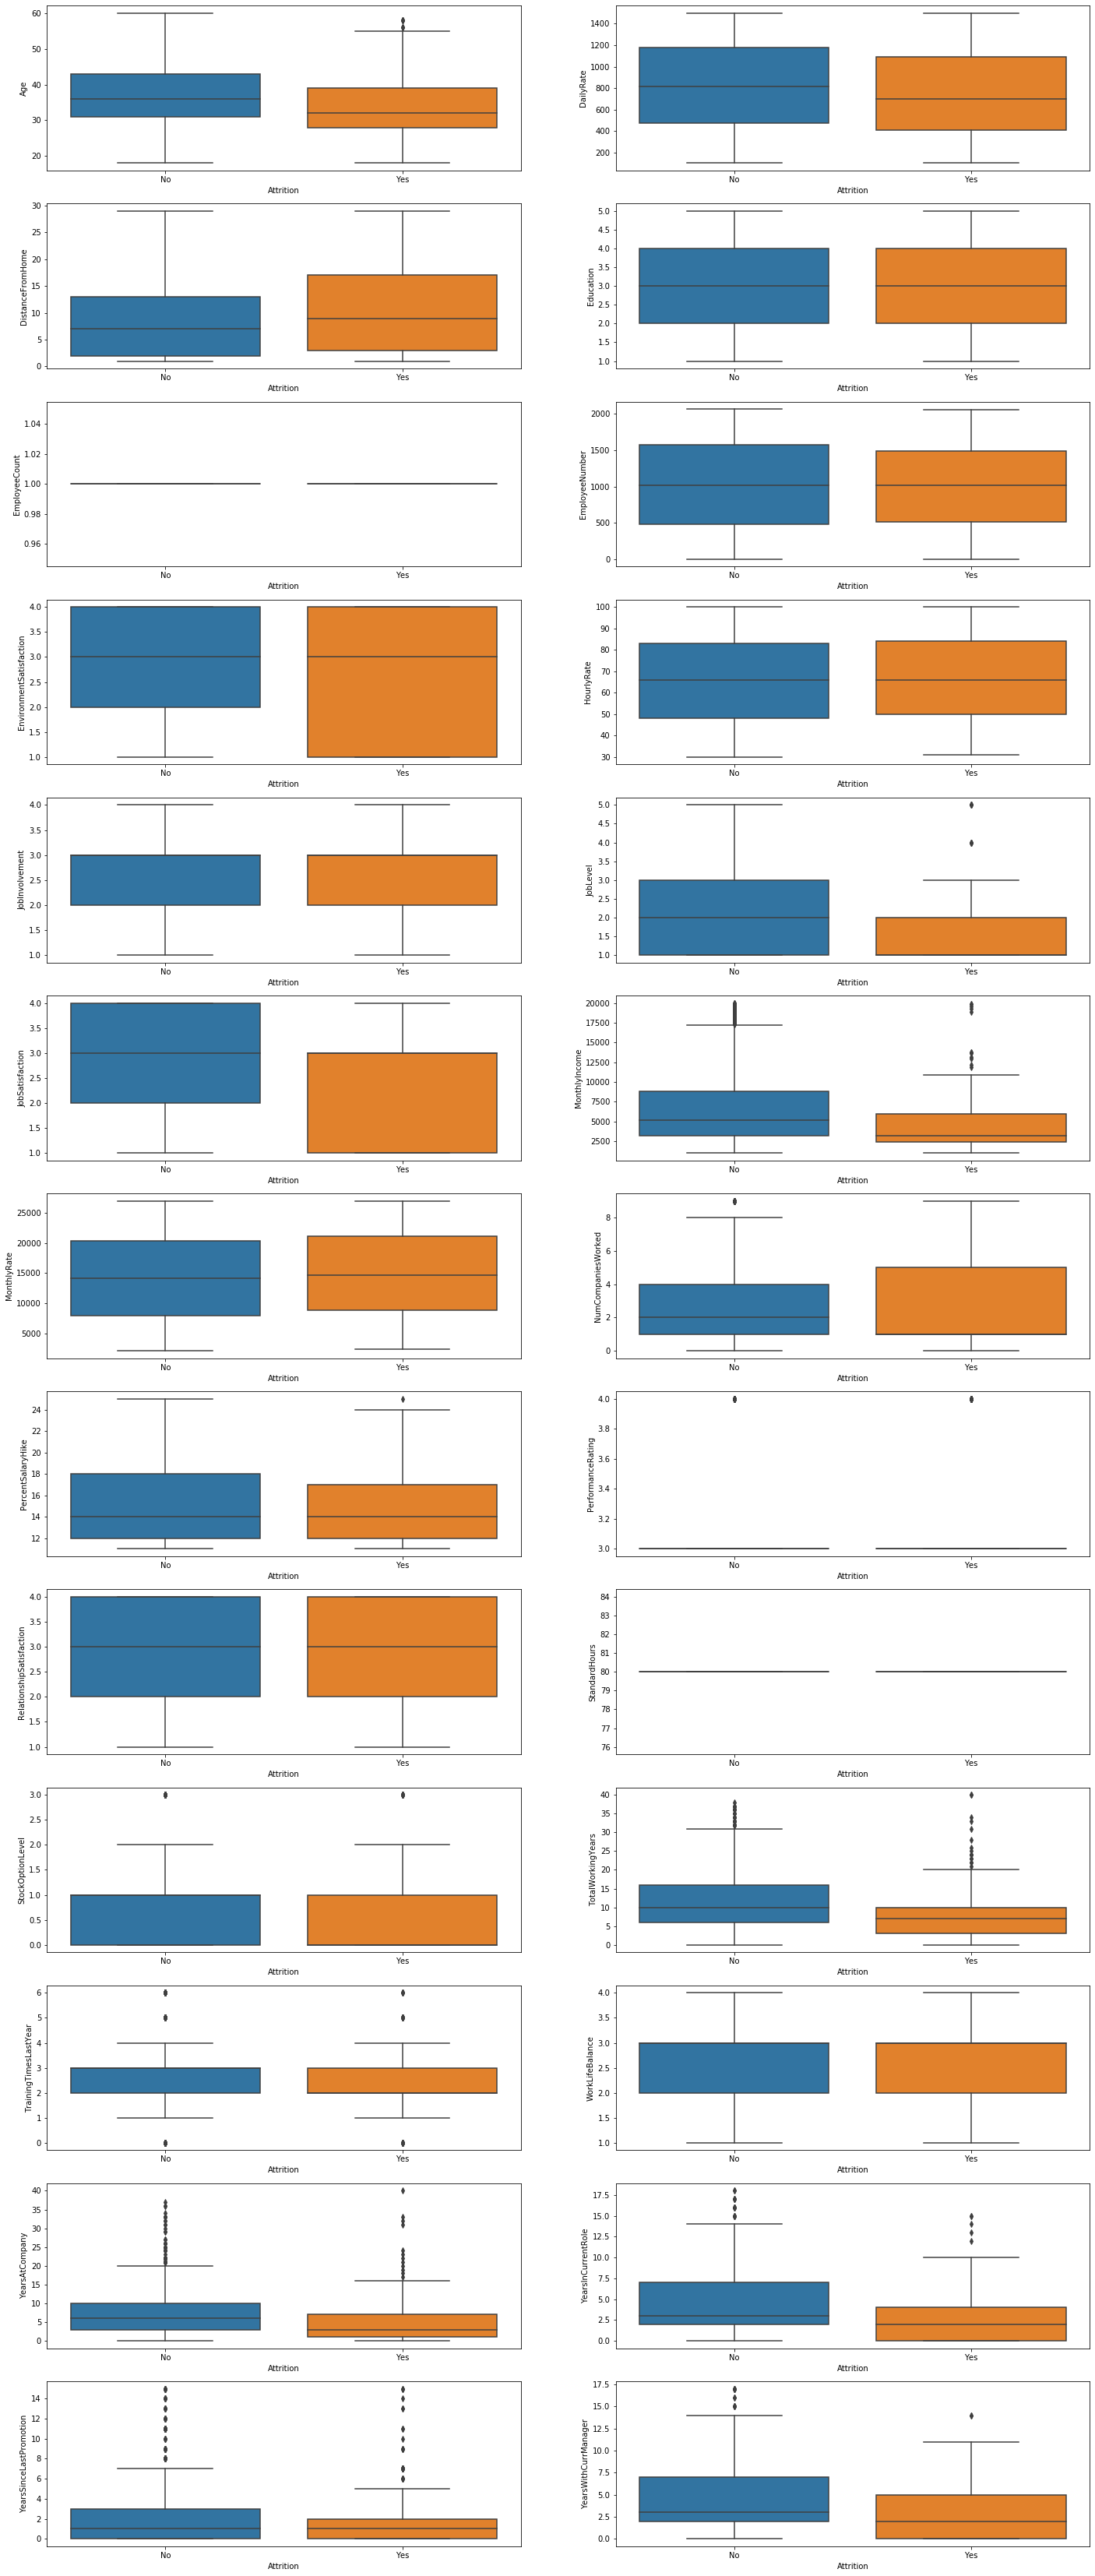

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

fig=plt.figure(figsize=(24,60))
i=1
for col in data[num_cols]:
    plt.subplot(13,2,i)
    sns.boxplot(x=data['Attrition'],y=data[col])
    i=i+1
plt.show()

# Univariate Analysis

In [49]:
#Analysing the target variable 'Attrition'
data.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

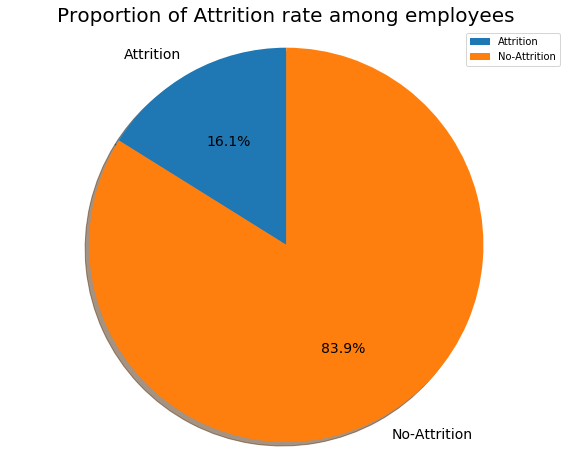

In [52]:
labels='Attrition','No-Attrition'
sizes = [data.Attrition[data['Attrition']=='Yes'].count(), data.Attrition[data['Attrition']=='No']
         .count()]

fig, ax = plt.subplots(figsize=(10,8))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, 
       textprops={'fontsize':14})
ax.axis('equal')
plt.legend(loc='upper right')
plt.title("Proportion of Attrition rate among employees",size=20)
plt.show()

In [56]:
data.columns.size
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [62]:
data.BusinessTravel.value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

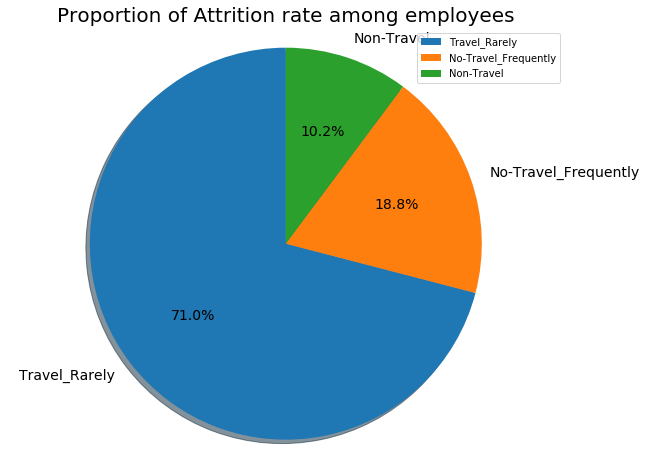

In [68]:
labels='Travel_Rarely','No-Travel_Frequently','Non-Travel'
sizes = [data.Attrition[data['BusinessTravel']=='Travel_Rarely'].count(), data.Attrition[data['BusinessTravel']=='Travel_Frequently'].count(), 
         data.Attrition[data['BusinessTravel']=='Non-Travel'].count()]

fig, ax = plt.subplots(figsize=(10,8))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, 
       textprops={'fontsize':14})
ax.axis('equal')
plt.legend(loc='upper right')
plt.title("Proportion of Attrition rate among employees",size=20)
plt.show()

# Bi-variate Analysis


In [70]:
def bivariate_cat(data,col1,col2,rot):
    cross_tab = pd.crosstab(data[col1], data[col2]).apply(lambda x: x/x.sum() * 100, axis=1).round(2)
    ct_attr = cross_tab['Yes'].sort_values(ascending=False)
    ct_attr.plot.bar(figsize=(12,5))
    plt.xlabel('{}'.format(col1))
    plt.ylabel('% of attrition among employees'.format(col1))
    plt.title('{} Vs attrition rate'.format(col1))
    plt.xticks(rotation=rot)
    plt.show()
    return ct_attr

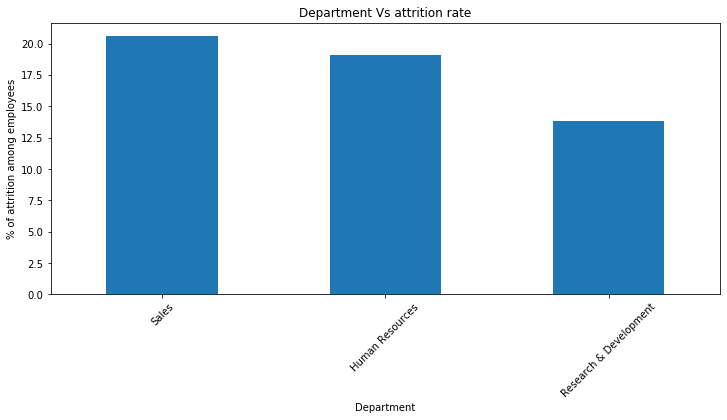

Department
Sales                     20.63
Human Resources           19.05
Research & Development    13.84
Name: Yes, dtype: float64

In [73]:
bivariate_cat(data,'Department','Attrition',45 )


# Chi-Square relationship among categorical features


In [77]:
from scipy.stats import chi2_contingency
import numpy as np

factors_paired = [(i,j) for i in cat_cols for j in cat_cols]
chi2, p_values = [], []
for f in factors_paired:
    if f[0] != f[1]:
        chitest = chi2_contingency(pd.crosstab(data[f[0]], data[f[1]]))
        chi2.append(chitest[0])
        p_values.append(chitest[1])
    else:
        chi2.append(0)
        p_values.append(0)
        
p1 = np.array(p_values).reshape((9,9))
p1 = pd.DataFrame(p1.round(2), index=cat_cols, columns=cat_cols)
p1

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
Attrition,0.00,0.00,0.00,0.01,0.29,0.00,0.00,1.0,0.00
BusinessTravel,0.00,0.00,1.00,0.88,0.13,0.74,0.11,1.0,0.24
Department,0.00,1.00,0.00,0.00,0.23,0.00,0.16,1.0,0.95
EducationField,0.01,0.88,0.00,0.00,0.71,0.00,0.48,1.0,0.88
Gender,0.29,0.13,0.23,0.71,0.00,0.04,0.17,1.0,0.12
JobRole,0.00,0.74,0.00,0.00,0.04,0.00,0.04,1.0,0.58
MaritalStatus,0.00,0.11,0.16,0.48,0.17,0.04,0.00,1.0,0.66
Over18,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.0,1.00
OverTime,0.00,0.24,0.95,0.88,0.12,0.58,0.66,1.0,0.00


In [83]:
data = data.drop("Over18", axis=1)

KeyError: "['Over18'] not found in axis"

In [84]:
data.shape

(1470, 34)

# Relationship between "Age" and "Attrition"¶


In [87]:
print("Min Age:",min(data['Age']))
print("Max Age:",max(data['Age']))

Min Age: 18
Max Age: 60


In [88]:
emp_attr=data

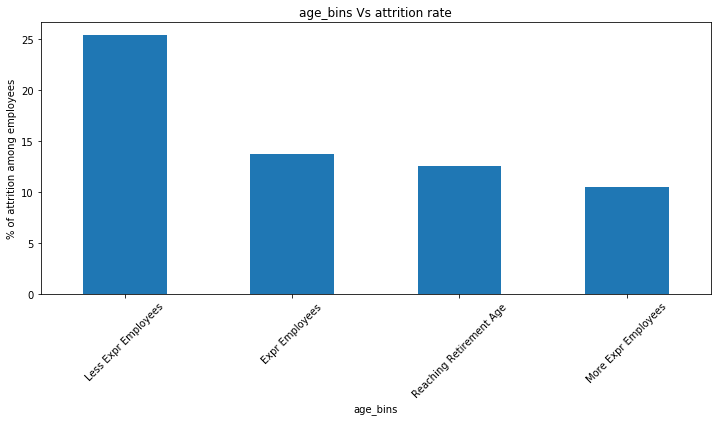

age_bins
Less Expr Employees        25.40
Expr Employees             13.73
Reaching Retirement Age    12.59
More Expr Employees        10.56
Name: Yes, dtype: float64

In [90]:
emp_attr['age_bins'] = pd.cut(emp_attr.Age,bins=[18,30,40,50,60],labels=['Less Expr Employees','Expr Employees','More Expr Employees','Reaching Retirement Age'])
bivariate_cat(emp_attr,'age_bins','Attrition',45)


# Chi-Square test between "age_bins" and "Attrition"


In [92]:
cross_tab = pd.crosstab(emp_attr['age_bins'], emp_attr['Attrition'],margins=True)
cross_tab

Attrition,No,Yes,All
age_bins,,,
Less Expr Employees,282,96,378
Expr Employees,534,85,619
More Expr Employees,288,34,322
Reaching Retirement Age,125,18,143
All,1229,233,1462


In [95]:
# Use for chi-square test
import researchpy as rp
table, results = rp.crosstab(emp_attr['age_bins'], emp_attr['Attrition'],prop='col',test='chi-square')
table

Attrition                
                               No     Yes     All
age_bins                                         
Less Expr Employees         22.95   41.20   25.85
Expr Employees              43.45   36.48   42.34
More Expr Employees         23.43   14.59   22.02
Reaching Retirement Age     10.17    7.73    9.78
All                        100.00  100.00  100.00

In [97]:
results

,Chi-square test,results
0,Pearson Chi-square ( 3.0) =,35.6450
1,p-value =,0.0000
2,Cramer's V =,0.1561


# There is statistically significant relationship between age of employee and the attrition rate as shows the chi-square value = 32.8978 with p-value <0.00001. The strength of the relationship is small,with Cramer's V = 0.1661

In [101]:
#emp_attr = emp_attr.drop(['EmployeeNumber','EmployeeCount','age_bins'], axis=1)
emp_attr.columns


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# Scaling up features

In [103]:
emp_attr.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSince

In [107]:
from sklearn.preprocessing import LabelEncoder

# target column
tgt_col = ['Attrition']
# Categorical cols
category_names = emp_attr.nunique()[emp_attr.nunique() < 15].keys().tolist()
category_names = [x for x in category_names if x not in tgt_col]

# Numerical cols
num_cols = [i for i in emp_attr.columns if i not in category_names + tgt_col]

# Binary cols
bin_cols = emp_attr.nunique()[emp_attr.nunique()==2].keys().tolist()

# Multi-cols
multi_cols = [i for i in category_names if i not in bin_cols]

# Label Encoding Binary cols
le = LabelEncoder()
for i in bin_cols:
    emp_attr[i] = le.fit_transform(emp_attr[i])
    
# Duplicating cols for multi-value columns
emp_attr = pd.get_dummies(data=emp_attr, columns=multi_cols)
emp_attr.head()


,Age,Attrition,DailyRate,DistanceFromHome,Gender,HourlyRate,MonthlyIncome,MonthlyRate,OverTime,PercentSalaryHike,...,TrainingTimesLastYear_2,TrainingTimesLastYear_3,TrainingTimesLastYear_4,TrainingTimesLastYear_5,TrainingTimesLastYear_6,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4,StandardHours_80_1
0,41,1,1102,1,0,94,5993,19479,1,11,...,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,61,5130,24907,0,23,...,0,1,0,0,0,0,0,1,0,1
2,37,1,1373,2,1,92,2090,2396,1,15,...,0,1,0,0,0,0,0,1,0,1
3,33,0,1392,3,0,56,2909,23159,1,11,...,0,1,0,0,0,0,0,1,0,1
4,27,0,591,2,1,40,3468,16632,0,12,...,0,1,0,0,0,0,0,1,0,1


# Normalizing features

In [109]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
emp_attr[num_cols] = minmax.fit_transform(emp_attr[num_cols].values)

In [111]:
emp_attr.head()

,Age,Attrition,DailyRate,DistanceFromHome,Gender,HourlyRate,MonthlyIncome,MonthlyRate,OverTime,PercentSalaryHike,...,TrainingTimesLastYear_2,TrainingTimesLastYear_3,TrainingTimesLastYear_4,TrainingTimesLastYear_5,TrainingTimesLastYear_6,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4,StandardHours_80_1
0,0.547619,1,0.715820,0.000000,0,0.914286,0.262454,0.698053,1,0.000000,...,0,0,0,0,0,1,0,0,0,1
1,0.738095,0,0.126700,0.250000,1,0.442857,0.217009,0.916001,0,0.857143,...,0,1,0,0,0,0,0,1,0,1
2,0.452381,1,0.909807,0.035714,1,0.885714,0.056925,0.012126,1,0.285714,...,0,1,0,0,0,0,0,1,0,1
3,0.357143,0,0.923407,0.071429,0,0.371429,0.100053,0.845814,1,0.000000,...,0,1,0,0,0,0,0,1,0,1
4,0.214286,0,0.350036,0.035714,1,0.142857,0.129489,0.583738,0,0.071429,...,0,1,0,0,0,0,0,1,0,1


# Model Building

In [118]:
cols = [i for i in emp_attr.columns if i not in emp_attr['Attrition']]
X = emp_attr[cols]
Y = pd.DataFrame(emp_attr['Attrition'])
X.head()
Y.head()

,Attrition
0,1
1,0
2,1
3,0
4,0


# Logistic Regression using sklearn

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
X_train,X_test,Y_train,Y_test = train_test_split(X ,Y ,test_size=0.3, stratify=Y,random_state=0)

In [129]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
logReg.fit(X_train, Y_train)
y_pred = logReg.predict(X_test)

c:\users\cdileepkumar\documents\02 python_practice\03 softwares\01 python\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [131]:
# Score method to get accuracy of model
score = logReg.score(X_test,Y_test)
print("Accuracy score of model:",score.round(2))

Accuracy score of model: 1.0


In [134]:
# Precting Probabilities for test data
Y_pred_proba = logReg.predict_proba(X_test)
Y_pred_proba

array([[0.99145037, 0.00854963],
       [0.99741199, 0.00258801],
       [0.99645158, 0.00354842],
       [0.99077649, 0.00922351],
       [0.99404123, 0.00595877],
       [0.99161014, 0.00838986],
       [0.99594466, 0.00405534],
       [0.99255378, 0.00744622],
       [0.04200183, 0.95799817],
       [0.98730894, 0.01269106],
       [0.02108902, 0.97891098],
       [0.99635946, 0.00364054],
       [0.99662179, 0.00337821],
       [0.9931555 , 0.0068445 ],
       [0.99399765, 0.00600235],
       [0.04657939, 0.95342061],
       [0.99120698, 0.00879302],
       [0.99163696, 0.00836304],
       [0.98686632, 0.01313368],
       [0.98773976, 0.01226024],
       [0.99334189, 0.00665811],
       [0.9883395 , 0.0116605 ],
       [0.98742688, 0.01257312],
       [0.99234687, 0.00765313],
       [0.99197595, 0.00802405],
       [0.99343674, 0.00656326],
       [0.99665497, 0.00334503],
       [0.99524505, 0.00475495],
       [0.99529612, 0.00470388],
       [0.99630541, 0.00369459],
       [0.

In [136]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve

In [138]:
pred_proba_df = pd.DataFrame(logReg.predict_proba(X_test))
threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
precision_lst = []
recall_lst = []
for i in threshold_list:
    #print ('\n******** For threshold = {} ******'.format(i))
    
    Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    precision = precision_score(Y_test.as_matrix().reshape(Y_test.as_matrix().size,1),
                               (Y_test_pred.iloc[:,1].as_matrix().reshape(Y_test_pred.iloc[:,1].as_matrix().size,1)))
    precision_lst.append(precision)
    recall = recall_score(Y_test.as_matrix().reshape(Y_test.as_matrix().size,1),
                         (Y_test_pred.iloc[:,1].as_matrix().reshape(Y_test_pred.iloc[:,1].as_matrix().size,1)))
    recall_lst.append(recall)

c:\users\cdileepkumar\documents\02 python_practice\03 softwares\01 python\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
c:\users\cdileepkumar\documents\02 python_practice\03 softwares\01 python\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
c:\users\cdileepkumar\documents\02 python_practice\03 softwares\01 python\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':
c:\users\cdileepkumar\documents\02 python_practice\03 softwares\01 python\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]
c:\users\cdileepkumar\documents\02 pytho

In [140]:
thresh_df = pd.DataFrame()
thresh_df['Threshold'] = threshold_list
thresh_df['Precision'] = precision_lst
thresh_df['Recall'] = recall_lst

In [142]:
thresh_df

,Threshold,Precision,Recall
0,0.05,1.0,1.000000
1,0.10,1.0,1.000000
2,0.15,1.0,1.000000
3,0.20,1.0,1.000000
4,0.25,1.0,1.000000
5,0.30,1.0,1.000000
6,0.35,1.0,1.000000
7,0.40,1.0,1.000000
8,0.45,1.0,1.000000
9,0.50,1.0,1.000000


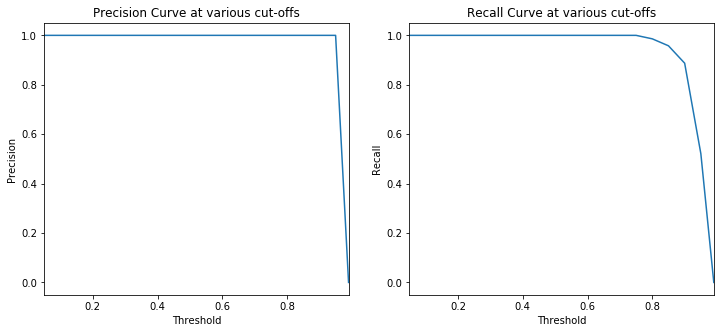

In [144]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2, sharex=True,figsize=(12,5))

# Use ax1 to plot precision
thresh_df.plot(x='Threshold', y='Precision',legend=False, ax=ax1)
ax1.set_ylabel('Precision')
ax1.set_title("Precision Curve at various cut-offs")

# Use ax2 to plot recall
thresh_df.plot(x='Threshold',y='Recall',legend=False, ax=ax2)
ax2.set_ylabel('Recall')
ax2.set_title("Recall Curve at various cut-offs")

plt.show()

# Confusion Matrix

In [146]:
from sklearn.metrics import confusion_matrix

Confusion Matrix : [[370   0]
 [  0  71]]


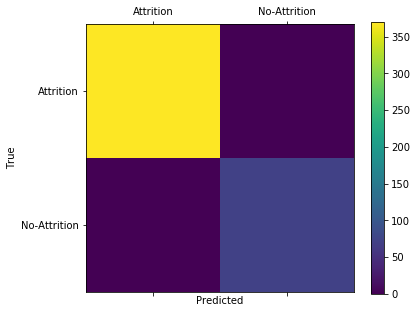

In [148]:
# Confusion Matrix
labels=['Attrition','No-Attrition']
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix :",conf_matrix)
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
cax = ax.matshow(conf_matrix)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
from yellowbrick.classifier import ClassificationReport
